In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


ModuleNotFoundError: No module named 'ucimlrepo'

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [4]:
import pandas as pd
df = pd.read_csv("path_to_adult_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_adult_dataset.csv'

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

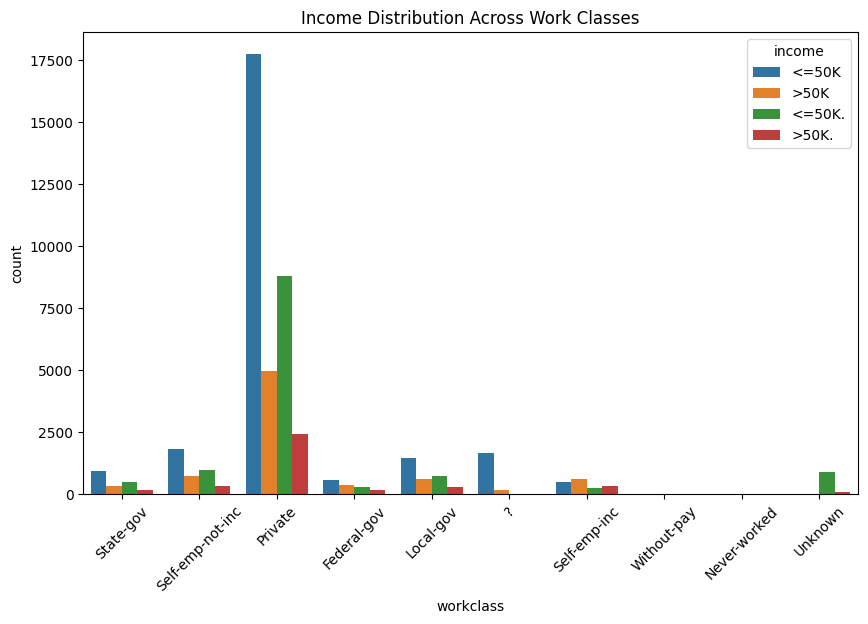

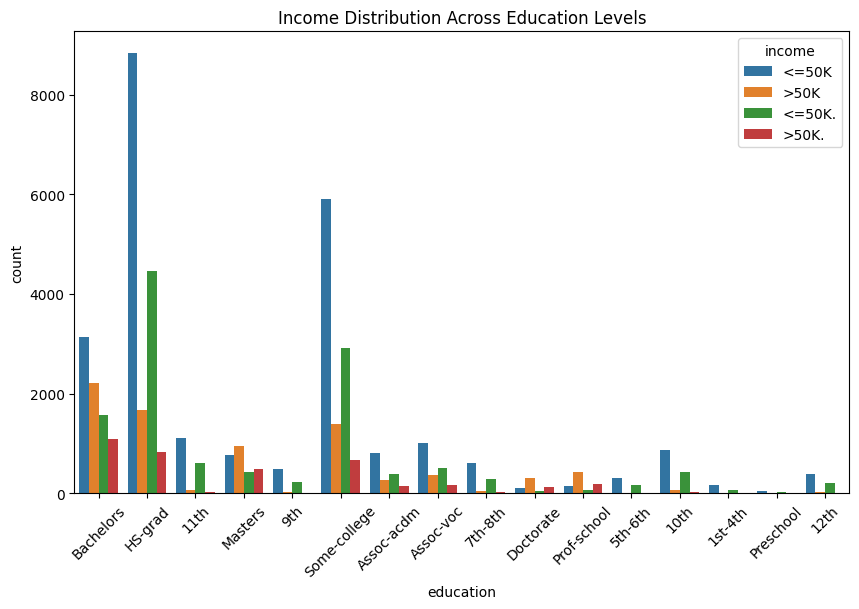

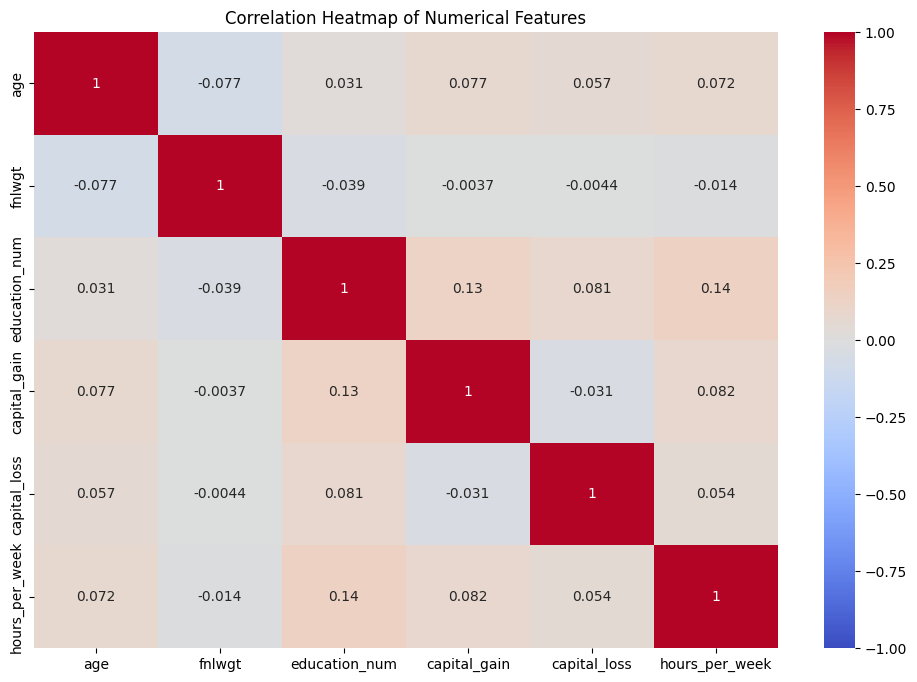

Features most correlated with income >50K:
 income                               1.000000
marital_status_Married-civ-spouse    0.346926
education_num                        0.260855
age                                  0.178818
hours_per_week                       0.178245
                                       ...   
relationship_Unmarried              -0.110058
occupation_Other-service            -0.121032
relationship_Not-in-family          -0.148451
relationship_Own-child              -0.177129
marital_status_Never-married        -0.248657
Name: income, Length: 104, dtype: float64
Age distribution by income:
          count       mean        std   min   25%   50%   75%   max
income                                                             
<=50K   24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0
<=50K.  12435.0  37.048010  14.268633  17.0  25.0  34.0  46.0  90.0
>50K     7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0
>50K.    3846.0  44.326833  10.641164  1

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# Step 1: Load the dataset
# Fetch dataset
adult = fetch_ucirepo(id=2)

# Separate features and target
X = adult.data.features
y = adult.data.targets

# Display metadata and variable information for reference
print(adult.metadata)
print(adult.variables)

# Combine features and target into a single DataFrame for ease of manipulation
df = pd.concat([X, y], axis=1)

# Rename columns to descriptive names based on dataset description
df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

# Step 2: Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Handle missing values by replacing them with 'Unknown' for categorical and 0 for numerical columns (as an example)
df.fillna({
    'workclass': 'Unknown',
    'occupation': 'Unknown',
    'native_country': 'Unknown'
}, inplace=True)

# Step 3: Data Exploration
# Summary of the dataset
print(df.describe())

# Unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

# Step 4: Data Transformation
# Convert categorical variables to dummy variables (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=[
    'workclass', 'education', 'marital_status', 'occupation',
    'relationship', 'race', 'sex', 'native_country'
], drop_first=True)

# Normalize numerical columns
scaler = StandardScaler()
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Step 5: Data Visualization
# Income distribution across work classes and education levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='workclass', hue='income')
plt.title('Income Distribution Across Work Classes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='income')
plt.title('Income Distribution Across Education Levels')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded[numerical_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Step 6: Insight Generation
# Investigate feature importance for income over 50K
df_encoded['income'] = (df_encoded['income'] == '>50K').astype(int)
correlation_with_income = df_encoded.corr()['income'].sort_values(ascending=False)
print("Features most correlated with income >50K:\n", correlation_with_income)

# Additional demographics-based insights
print("Age distribution by income:")
print(df.groupby('income')['age'].describe())

print("Race distribution by income:")
print(df.groupby('income')['race'].value_counts(normalize=True))

print("Gender distribution by income:")
print(df.groupby('income')['sex'].value_counts(normalize=True))